In [33]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

# Create a grid of x, y values
x = np.linspace(-0.5, 0.5, 50)
y = np.linspace(-0.3, 0.5, 50)
x, y = np.meshgrid(x, y)

# Calculate the function values for each point in the grid
z = -(2*x**2 - y) * (y - x**2)

# Point to be marked
x_point = [0]
y_point = [0]
z_point = [(2*x_point[0]**2 - y_point[0]) * (y_point[0] - x_point[0]**2)]

# Render the 3D surface plot
fig = go.Figure(data=[
    go.Surface(z=z, x=x, y=y, colorscale='Sunset', contours=dict(z=dict(show=True, usecolormap=True, start=0, end=1, size=0.05, project_z=True))),
    go.Scatter3d(x=x_point, y=y_point, z=z_point, mode='markers', marker=dict(size=8, color='blue'), name="(0, 0)")
])


fig.update_layout(scene=dict(
                      xaxis_title='x',
                      yaxis_title='y',
                      zaxis_title='f(x,y)'
                  ),
                  template="plotly_white"
                 )

plotly_config = {
    'displaylogo': False,
    'toImageButtonOptions': {
        'format': 'svg',
        'filename': 'peano_surface',
        'height': None,
        'width': None,
        'scale': 1
    },
    'modeBarButtonsToRemove': ['select2d', 'lasso2d'],
    'modeBarButtonsToAdd': ['drawopenpath', 'eraseshape']
}

fig.write_html(
        "peano_surface.html",
        config=plotly_config,
        include_plotlyjs="cdn",
        full_html=False,
    )

fig.show()


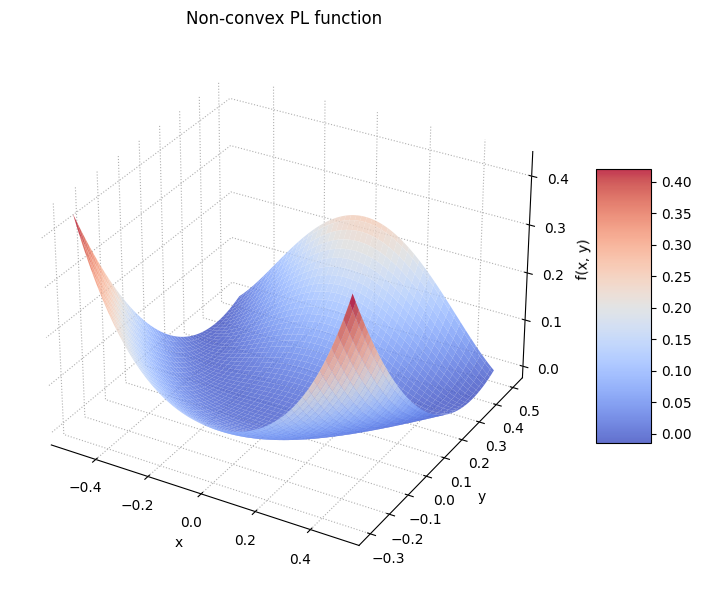

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (y - np.sin(x)) ** 2 / 2

# Generate x and y values
x = np.linspace(-.5, .5, 100)
y = np.linspace(-.3, .5, 100)

# Create meshgrid
X, Y = np.meshgrid(x, y)
Z = -(2*X**2 - Y) * (Y - X**2)

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
surf = ax.plot_surface(X, Y, Z, alpha=0.8, cmap='coolwarm', edgecolor='none')

# Customizing the ticks and labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Non-convex PL function')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.xaxis._axinfo["grid"]['linestyle'] = ":"
ax.yaxis._axinfo["grid"]['linestyle'] = ":"
ax.zaxis._axinfo["grid"]['linestyle'] = ":"

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig("peano_surface.pdf", format='pdf')
plt.show()
